<a href="https://colab.research.google.com/github/Aria011/CODSOFT/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

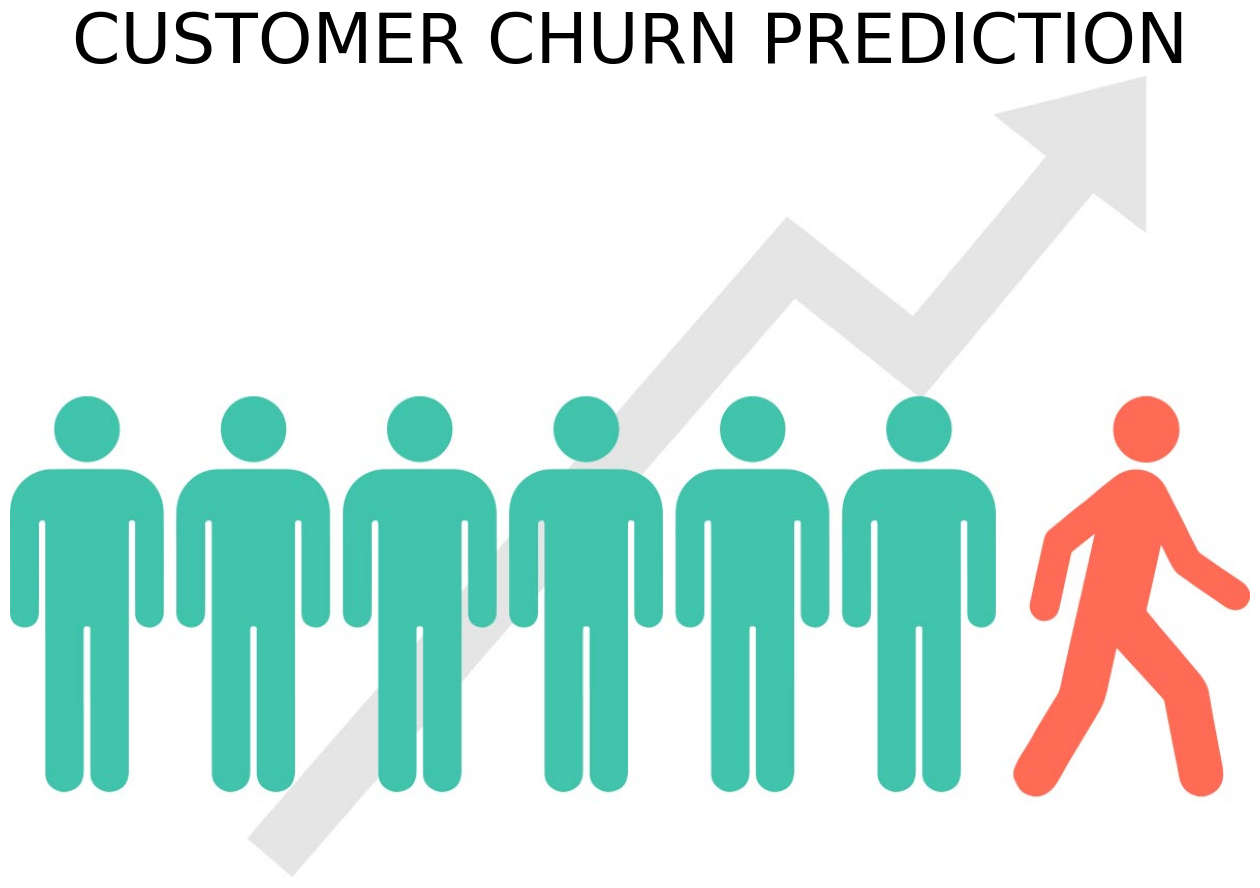

Importing required libraries and packages


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Codsoft Internship/ML/Churn/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

,0
CustomerId,int64
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64


In [ ]:
encoder=LabelEncoder()
labels=["Gender","Geography"]
for label in labels:
  df[label]=encoder.fit_transform(df[label])
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['Geography'].unique()

array([0, 2, 1])

In [ ]:
df['Gender'].unique()

array([0, 1])

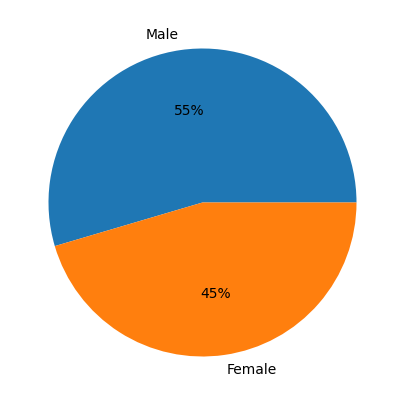

In [ ]:
plt.figure(figsize = (10,5))
plt.pie(df['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',)   #explode = [0.1,0],shadow = True
plt.show()

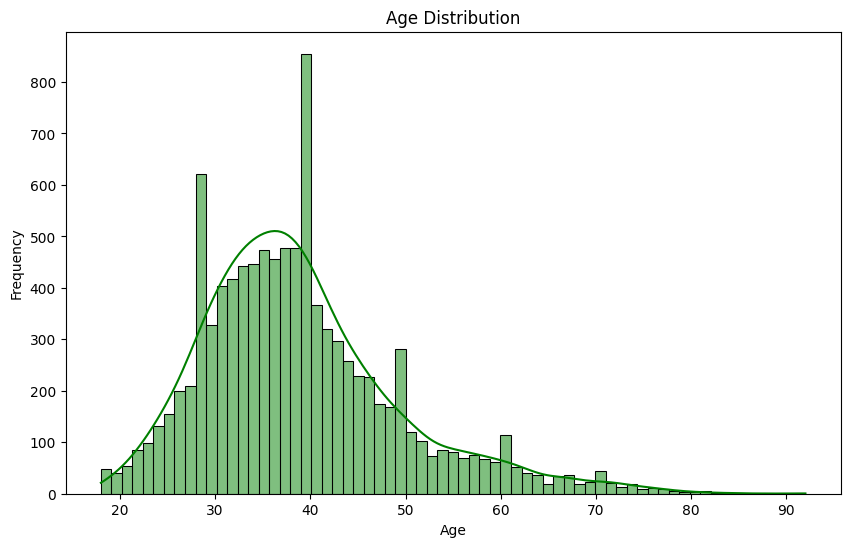

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'],kde=True,color ='Green')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

<Axes: >

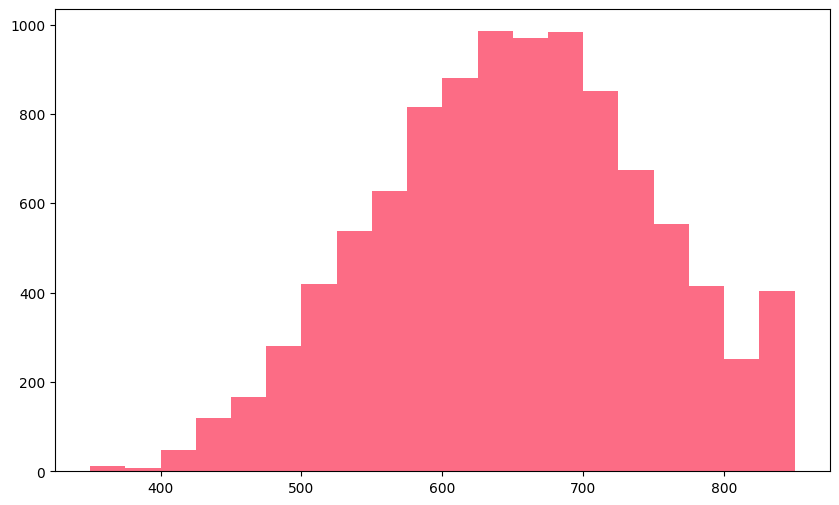

In [ ]:
df['CreditScore'].hist(bins=20, figsize=(10, 6),color='#FC6C85',grid=(False))

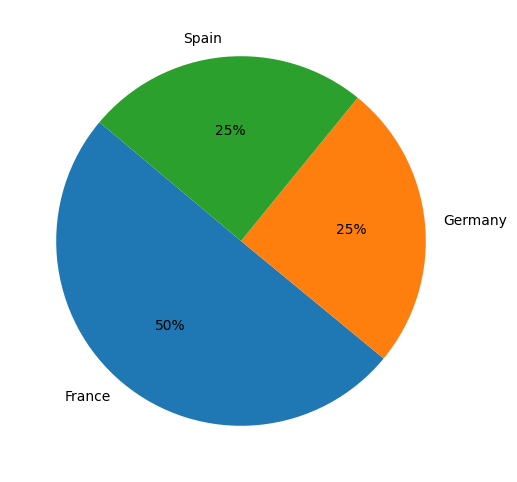

In [ ]:
plt.figure(figsize = (10,6))
plt.pie(df['Geography'].value_counts().values,labels=['France','Germany','Spain'],autopct='%.f%%',startangle=140,)
plt.show()

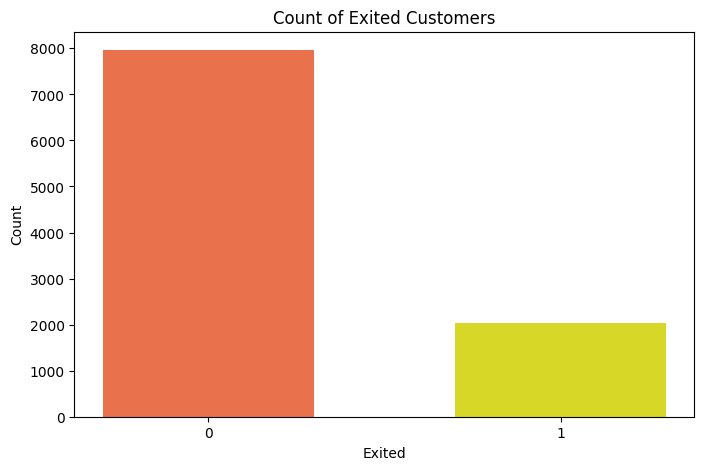

In [ ]:
exited_counts = df['Exited'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar([0, 1], exited_counts.values,color=['#e9724d', '#d6d727'], width=0.6)
plt.xticks([0, 1], labels=[0, 1])  # Set the x-axis labels to 0 and 1
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Exited Customers')
plt.show()


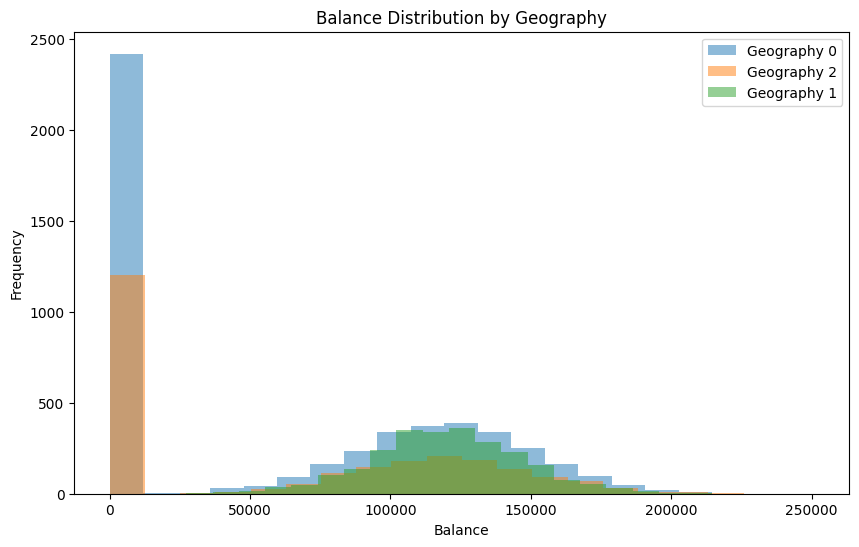

In [ ]:
plt.figure(figsize=(10, 6))

for geography in df['Geography'].unique():
    subset = df[df['Geography'] == geography]
    plt.hist(subset['Balance'], bins=20, alpha=0.5, label=f'Geography {geography}')

plt.xlabel('Balance')

plt.ylabel('Frequency')

plt.title('Balance Distribution by Geography')

_ = plt.legend()

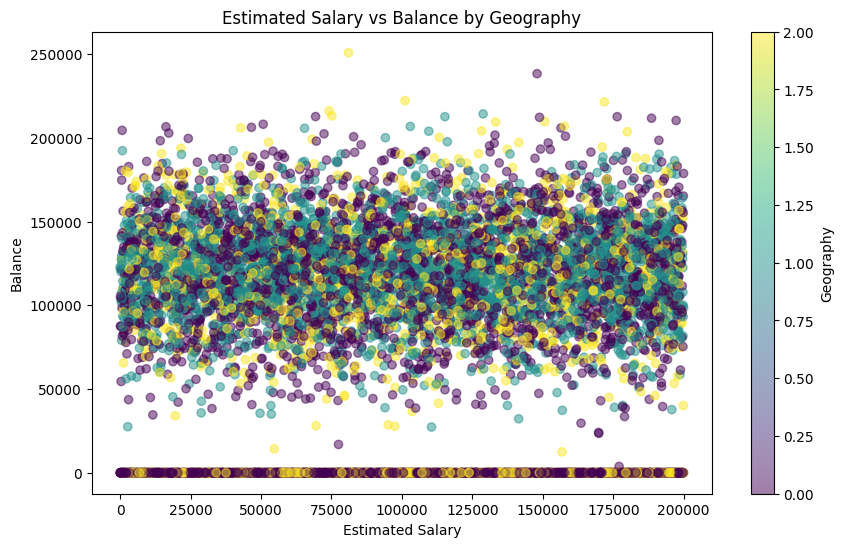

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['EstimatedSalary'], df['Balance'], c=df['Geography'], alpha=0.5)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Estimated Salary vs Balance by Geography')
_ = plt.colorbar(label='Geography')


**Outlier Detection**

In [ ]:
def outlier_detection(column):
    perc_25 = np.percentile(df[column], 25)
    perc_75 = np.percentile(df[column], 75)
    iqr = perc_75 - perc_25

    upper_bound = perc_75 + (1.5 * iqr)
    lower_bound = perc_25 - (1.5 * iqr)

    print(f"25th Percentile: {perc_25}")
    print(f"75th Percentile: {perc_75}")

    return df[column].apply(lambda x: x < lower_bound or upper_bound < x).sum()

<Axes: >

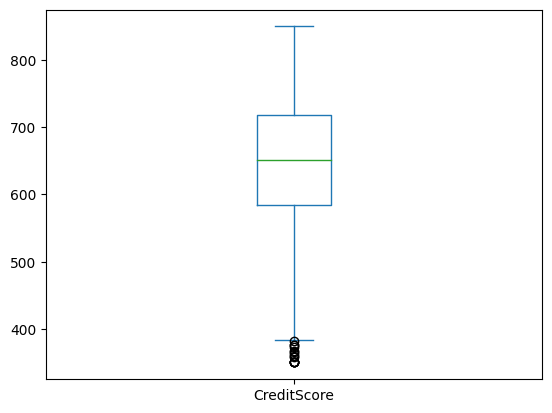

In [ ]:
df['CreditScore'].plot(kind='box')



CreditScore






In [ ]:
outlier_detection('CreditScore')


25th Percentile: 584.0
75th Percentile: 718.0


15

In [ ]:
df[df['CreditScore'] < 380]


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1
942,15804586,376,0,0,46,6,0.00,1,1,0,157333.69,1
1193,15779947,363,2,0,28,6,146098.43,3,1,0,100615.14,1
1405,15612494,359,0,0,44,6,128747.69,1,1,0,146955.71,1
1631,15685372,350,2,1,54,1,152677.48,1,1,1,191973.49,1
1838,15758813,350,1,1,39,0,109733.20,2,0,0,123602.11,1
1962,15692416,358,2,0,52,8,143542.36,3,1,0,141959.11,1
2473,15679249,351,1,0,57,4,163146.46,1,1,0,169621.69,1
2579,15597896,365,1,1,30,0,127760.07,1,1,0,81537.85,1
8154,15791533,367,2,1,42,6,93608.28,1,1,0,168816.73,1


<Axes: >

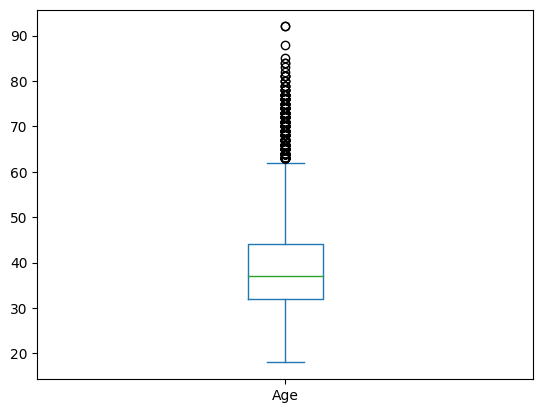

In [ ]:
df['Age'].plot(kind='box')



Age




In [ ]:
outlier_detection('Age')

25th Percentile: 32.0
75th Percentile: 44.0


359

In [ ]:
44 + (1.5 * (44-32))

62.0

In [ ]:
df[df['Age'] > 62]


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,15623944,511,2,0,66,4,0.00,1,1,0,1643.11,1
85,15805254,652,2,0,75,10,0.00,2,1,1,114675.75,0
104,15804919,670,2,0,65,1,0.00,1,1,1,177655.68,1
158,15589975,646,0,0,73,6,97259.25,1,0,1,104719.66,0
181,15789669,510,0,1,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9753,15705174,656,1,1,68,7,153545.11,1,1,1,186574.68,0
9765,15777067,445,0,1,64,2,136770.67,1,0,1,43678.06,0
9832,15814690,595,1,0,64,2,105736.32,1,1,1,89935.73,1
9894,15704795,521,0,0,77,6,0.00,2,1,1,49054.10,0


**Outlier removal**

Age

In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
low=Q1 - 1.5 * IQR
high=Q3 + 1.5 * IQR
datawithout=df[(df['Age']< high) & (df['Age']>low)]

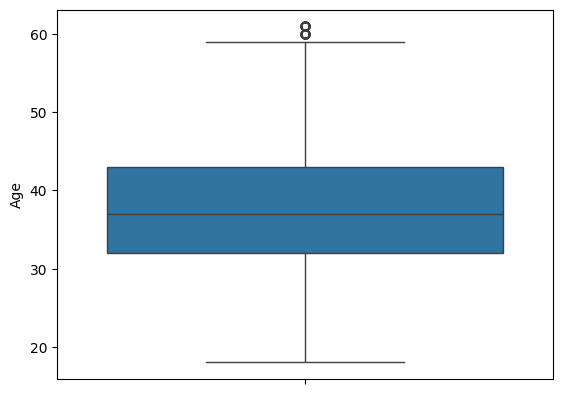

In [ ]:
sns.boxplot(datawithout['Age'])
plt.show()

Credit Score

In [ ]:
Q1=df['CreditScore'].quantile(0.25)
Q3=df['CreditScore'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
low=Q1 - 1.5 * IQR
high=Q3 + 1.5 * IQR
datawithout=df[(df['CreditScore']< high) & (df['CreditScore']>low)]

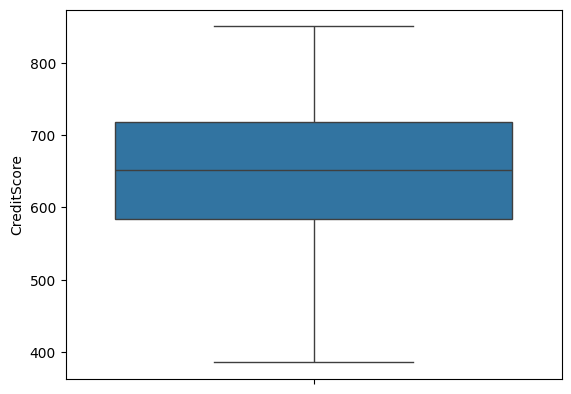

In [ ]:
sns.boxplot(datawithout['CreditScore'])
plt.show()

In [ ]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X=df.iloc[:,:-1]
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y=df.iloc[:,-1]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


**Oversampling due to imbalanced data**

In [ ]:
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os.shape

(15926, 11)

In [ ]:
y_os.shape

(15926,)

In [ ]:
scaler=MinMaxScaler()
X_os_scaled=scaler.fit_transform(X_os)
X_os_scaled

array([[0.27561613, 0.538     , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.32645436, 0.516     , 1.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.21442143, 0.304     , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.91625232, 0.654     , 0.        , ..., 0.        , 0.        ,
        0.72289464],
       [0.931821  , 0.458     , 0.        , ..., 0.        , 0.        ,
        0.44192984],
       [0.33878291, 0.266     , 0.        , ..., 0.        , 0.        ,
        0.95663658]])

**Train test Split**

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=12)

**Model Building**

RandomForestClassifier(random_state=1)
0.8612390121389703
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2348
           1       0.87      0.86      0.86      2430

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
LogisticRegression(random_state=1)
0.7756383424026789
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2348
           1       0.78      0.79      0.78      2430

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778

---------------------------------

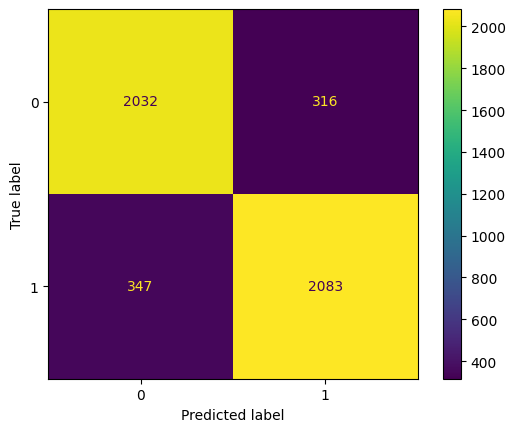

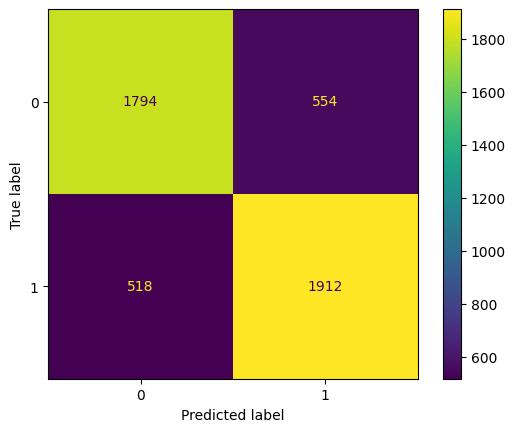

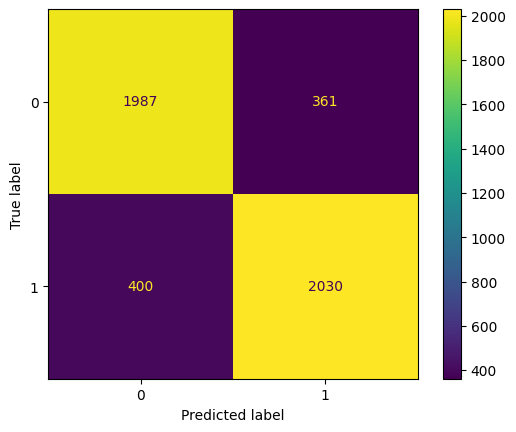

In [ ]:
rf=RandomForestClassifier(random_state=1)
lr=LogisticRegression(random_state=1)
gb=GradientBoostingClassifier(random_state=1)


r=[]
model=[rf,lr,gb]
for i in model:
  print(i)
  i.fit(X_os_train,y_os_train)
  y_os_pred=i.predict(X_os_test)
  r.append({"Model":i.__class__.__name__, "Accuracy":accuracy_score(y_os_test,y_os_pred)})
  print(accuracy_score(y_os_test,y_os_pred))
  print(classification_report(y_os_test,y_os_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_os_pred))
  print("-"*200)

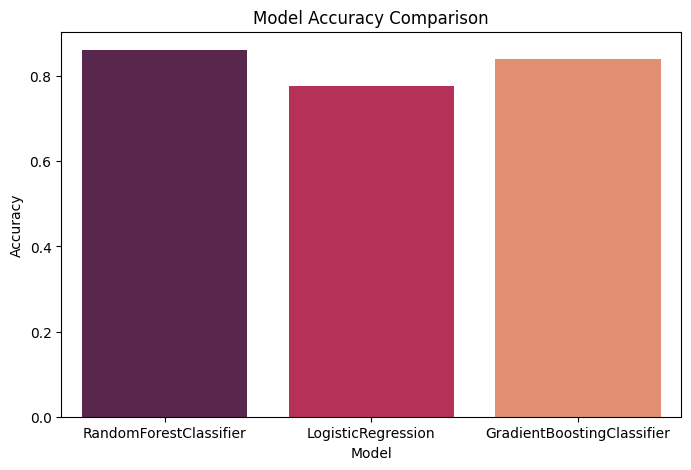

In [ ]:
accuracy_df = pd.DataFrame(r)
palette = sns.color_palette("rocket", len(accuracy_df))
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=palette)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

**HyperParameter tuning**

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=12,
    n_jobs=-1
)

random_search.fit(X_os_train, y_os_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict using the best model
best_rf = random_search.best_estimator_
y_os_pred = best_rf.predict(X_os_test)
print("Test Accuracy:", accuracy_score(y_os_test, y_os_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score: 0.8481341944743451
Test Accuracy: 0.8637505232314776


**Predicting the custom values**

In [ ]:
y_new=rf.predict(scaler.transform([[2,15619304,502,0,0,42,8,159660.80,3,0,113931.57]]))
result=y_new.item()
if result==0:
  print(" Has not churned ")

else:
    print("Has churned ")

Has churned 
